# TP0

## Integrantes
- Arian
- Ariel
- Juan Felipe
- Juan Luis Barberia

In [38]:
# Add ".."" to path to find the src module
import os
import sys
sys.path.append("..")

# import packages
from itertools import product
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Constantes
POKEMONES = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
POKEBOLAS = ["pokeball", "ultraball", "fastball", "heavyball"]

pokemon_factory = PokemonFactory("../pokemon.json")

## 1.A.

Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?




Probabilidad de Captura promedio por pokebola
---------------------------------------------
pokebola  pokeball  ultraball  fastball  heavyball
pokemon                                           
caterpie      0.36       0.62      0.34       0.30
jolteon       0.05       0.09      0.30       0.07
mewtwo        0.00       0.00      0.02       0.00
onix          0.04       0.11      0.06       0.12
snorlax       0.05       0.14      0.03       0.07


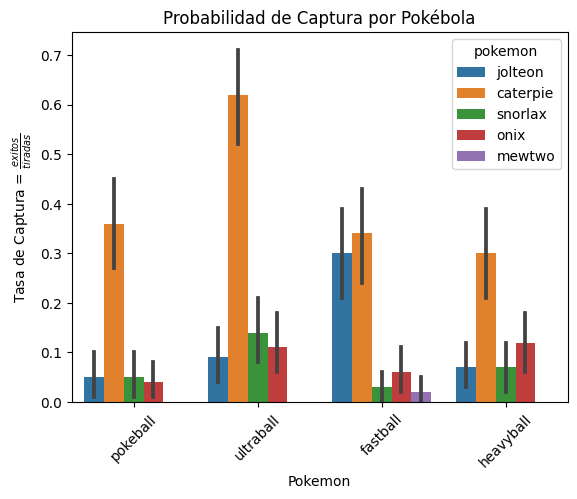

In [115]:
hp = 1.0
lvl = 1.0

results = []
for pokemon_name, pokebola in product(POKEMONES, POKEBOLAS):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.1)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
        })

df_results = pd.DataFrame(results)
results_per_pokemon = df_results.pivot_table(index="pokemon", columns="pokebola",
                                              values="attempt_success", aggfunc="mean")
print("Probabilidad de Captura promedio por pokebola")
print("---------------------------------------------")
print(results_per_pokemon[POKEBOLAS])

sns.barplot(x="pokebola", y="attempt_success", hue="pokemon",
            data=df_results, errorbar="ci")

plt.xlabel("Pokemon")
plt.ylabel("Tasa de Captura = $\\frac{exitos}{tiradas}$")
plt.title("Probabilidad de Captura por Pokébola")
plt.xticks(rotation=45)
plt.show()

## 1.B.

¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justiﬁcar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

A partir del gráfico podemos ver que cada pokebola posee distinta efectividad con respecto a las otras para cada uno de los pokemones y eso depende de las 
caracteristicas intrínsecas del pokemon.

 **Cálculo de la Efectividad Relativa de las Pokebolas**

La **efectividad_relativa** de una pokebola \( B \) en comparación con la **pokebola básica** se define como:

$Efectividad Relativa (B) = \frac{\text{Success Rate} (B)}{\text{Success Rate} (\text{Pokeball})}$

 **Ejemplo de cálculo para Caterpie con Ultraball**
- **Success Rate con Pokeball** = **0.29**  
- **Success Rate con Ultraball** = **0.68**  

Aplicamos la ecuación:

$Efectividad Relativa (Ultraball) = \frac{0.68}{0.35} = 1.94$

 **Ejemplo de cálculo para Caterpie con Fastball**
- **Success Rate con Pokeball** = **0.34**  
- **Success Rate con Fastball** = **0.35**  

$Efectividad Relativa(Fastball) = \frac{0.35}{0.34} = 1$

Estos cálculos demuestran cómo la efectividad varía en función del tipo de pokebola.

 *Fastball es altamente efectiva en Jolteon (2.56 veces más efectiva que la pokebola).*

Jolteon es un Pokémon rápido, lo que coincide con la mecánica de la Fastball, que tiene mayor éxito en Pokémon veloces.

 *Heavyball es más efectiva en Onix (1.8 veces más efectiva que la pokebola).*

Onix es un Pokémon muy pesado, y la Heavyball tiene bonificaciones según el peso, lo que explica esta mejora.

 *Ultraball es consistentemente más efectiva que la Pokeball para todos los Pokémon.*

En promedio, duplica la tasa de éxito, lo cual es esperado ya que tiene una bonificación general.

 *Heavyball es inefectiva en Jolteon (solo 0.11 veces la efectividad de la Pokeball).*

Esto se debe a que Jolteon es un Pokémon liviano y la Heavyball no le da ninguna bonificación.
Mewtwo es extremadamente difícil de atrapar con cualquier pokebola.

 **Todas las pokebolas tienen aproximadamente la misma tasa de éxito (~1%), lo que indica que la mecánica del juego lo hace muy difícil de capturar.**

## 2.A.

¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cual es más o menos efectiva?

Para resolverlo se ejecutó una función iterativa de captura que evalua N tiradas de pokebolas a los distintos pokemones que atravisan M estados de salud.


     Pokemon     estado   Pokebola  Tasa exito  Media de captura
0    jolteon   pokeball       NONE        0.02            0.0586
1    jolteon  ultraball       NONE        0.18            0.1172
2    jolteon   fastball       NONE        0.20            0.2344
3    jolteon  heavyball       NONE        0.02            0.0326
4    jolteon   pokeball      SLEEP        0.12            0.1172
..       ...        ...        ...         ...               ...
115   mewtwo  heavyball       BURN        0.00            0.0020
116   mewtwo   pokeball  PARALYSIS        0.01            0.0059
117   mewtwo  ultraball  PARALYSIS        0.02            0.0117
118   mewtwo   fastball  PARALYSIS        0.03            0.0234
119   mewtwo  heavyball  PARALYSIS        0.00            0.0020

[120 rows x 5 columns]


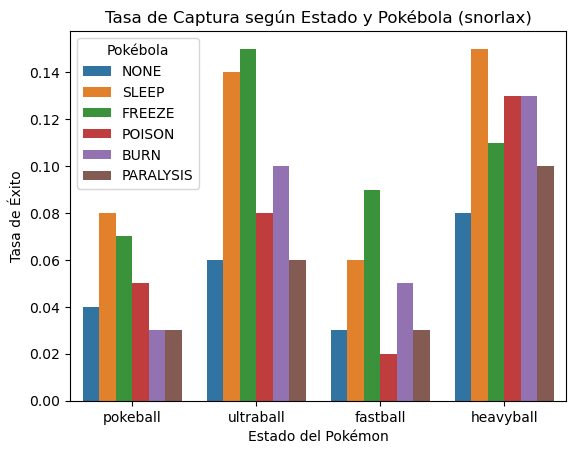

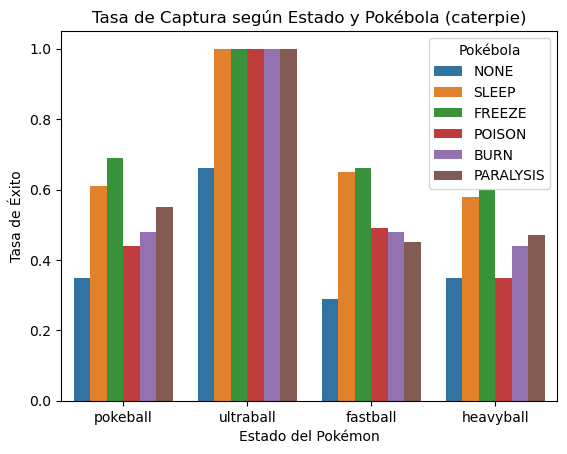

In [62]:
# Add ".."" to path to find the src module
import os
import sys

#sys.path.append("..")

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "pokemon.json"

with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]
estado_pokemon = ["NONE", "SLEEP", "FREEZE", "POISON", "BURN", "PARALYSIS"]
# Generacion

gen_pokemon = PokemonFactory(pokemon_file)


# Función que usa attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,estado_pokemon,intentos):
    resultados = []
    resultados_promediados = []
    NIVEL = 100
    HP = 1
    
    for estado in estado_pokemon:
        for bolas in pokebolas:
            exitos = 0
            probabilidad_exito = []
            
            for _ in range(intentos):
                pokes = gen_pokemon.create(pokemon, NIVEL, StatusEffect[estado], HP)
                exitos_tasa, capture = attempt_catch(pokes, bolas)

                if exitos_tasa:
                    exitos += 1
                probabilidad_exito.append(capture)   
                
            resultados.append([pokemon,bolas,estado,exitos/intentos,np.mean(probabilidad_exito)])    
   
    return resultados
        
INTENTOS = 100;
resultados = []
for pkmn in pokemon:
    resultados.extend((atrapar(pkmn, pokebolas,estado_pokemon,INTENTOS)))

df_results = pd.DataFrame(resultados, columns=["Pokemon","estado", "Pokebola", "Tasa exito", "Media de captura"])

print(df_results)

pokemon_seleccionado = "snorlax"
df_filtrado = df_results[df_results["Pokemon"] == pokemon_seleccionado] # Selecciono solo los datos del pokemon que quiero 
sns.barplot(data=df_filtrado, x="estado", y="Tasa exito", hue="Pokebola")


plt.xlabel("Estado del Pokémon")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado})")
plt.legend(title="Pokébola")
plt.show()

pokemon_seleccionado2 = "caterpie"
df_filtrado2 = df_results[df_results["Pokemon"] == pokemon_seleccionado2] # Selecciono solo los datos del pokemon que quiero 
sns.barplot(data=df_filtrado2, x="estado", y="Tasa exito", hue="Pokebola")

plt.xlabel("Estado del Pokémon")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado2})")
plt.legend(title="Pokébola")
plt.show()



En función de la respuesta del gráfico (realizada para dos de los pokemones, Snorlax y Caterpie ) es posible analizar que dependiendo del estado del pokemon las pokebolas poseen distinto grado de efectivida o tasa de éxito.


## 2.B.

¿Cómo afectan los puntos de vida a la efectividad de la captura?

Sugerencia: Elegir uno o dos Pokémon y, manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos % de HP.

Se evalua en un rango de decenas desde 10 a 100 (en porcentaje de HP) como varían las propiedades de las pokebolas

      Pokemon   HP   Pokebola  Tasa exito  Media de captura
0    caterpie   10   pokeball        0.91            0.9297
1    caterpie   10  ultraball        1.00            1.0000
2    caterpie   10   fastball        0.93            0.9297
3    caterpie   10  heavyball        0.81            0.8568
4    caterpie   20   pokeball        0.85            0.8633
..        ...  ...        ...         ...               ...
115   jolteon   90  heavyball        0.05            0.0396
116   jolteon  100   pokeball        0.05            0.0586
117   jolteon  100  ultraball        0.14            0.1172
118   jolteon  100   fastball        0.25            0.2344
119   jolteon  100  heavyball        0.03            0.0326

[120 rows x 5 columns]


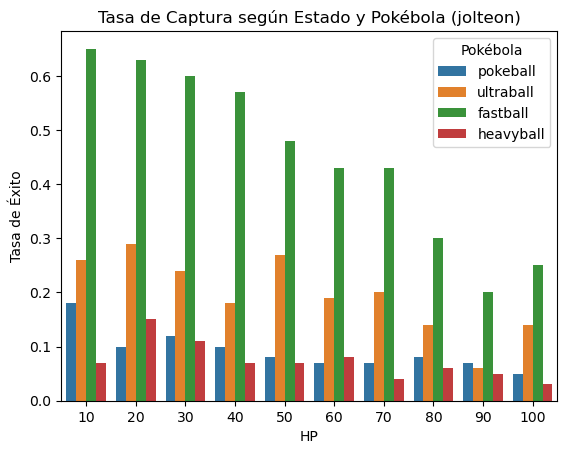

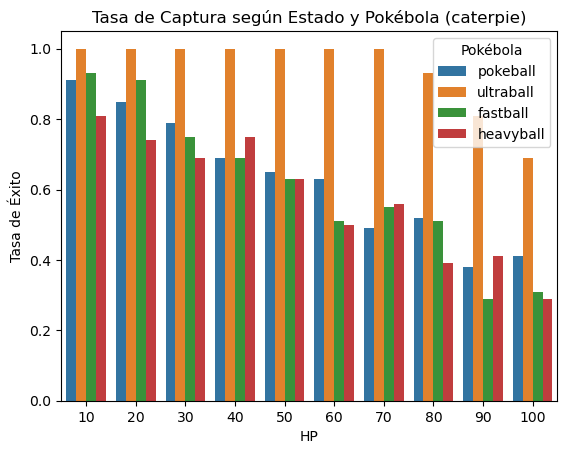

In [66]:
# Add ".."" to path to find the src module
import os
import sys

#sys.path.append("..")

import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# carga de pókemon

pokemon_file = "pokemon.json"

with open(pokemon_file,"r") as f:
    datos_pokemon = json.load(f)
     
# Pokebolas y pokemones

pokemon = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokebolas = ["pokeball", "ultraball", "fastball", "heavyball"]
HP = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Generacion

gen_pokemon = PokemonFactory(pokemon_file)



# La idea es generar una función que utilice attemp catch pero para varios pokemones

def atrapar(pokemon,pokebola,intentos,HP):
    resultados = []
    resultados_promediados = []
    NIVEL = 100
    
    
    for HPP in HP:
        for bolas in pokebolas:
            exitos = 0
            probabilidad_exito = []
            
            for _ in range(intentos):
                pokes = gen_pokemon.create(pokemon, NIVEL, StatusEffect.NONE, HPP/100)
                exitos_tasa, capture = attempt_catch(pokes, bolas)

                if exitos_tasa:
                    exitos += 1
                probabilidad_exito.append(capture)   
                
            resultados.append([pokemon,HPP,bolas,exitos/intentos,np.mean(probabilidad_exito)])    
   
    return resultados
        
INTENTOS = 100;
pokemon_comparacion = ["caterpie","snorlax",'jolteon']
resultados = []
for pkmn in pokemon_comparacion:
    resultados.extend((atrapar(pkmn, pokebolas,INTENTOS,HP)))
    
df_results = pd.DataFrame(resultados, columns=["Pokemon","HP", "Pokebola", "Tasa exito", "Media de captura"])

print(df_results)

pokemon_seleccionado = "jolteon"
df_filtrado = df_results[df_results["Pokemon"] == pokemon_seleccionado] # Selecciono solo los datos del pokemon que quiero 
sns.barplot(data=df_filtrado, x="HP", y="Tasa exito", hue="Pokebola")



plt.xlabel("HP")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado})")
plt.legend(title="Pokébola")
plt.show()

pokemon_seleccionado2 = "caterpie"
df_filtrado = df_results[df_results["Pokemon"] == pokemon_seleccionado2] # Selecciono solo los datos del pokemon que quiero 
sns.barplot(data=df_filtrado, x="HP", y="Tasa exito", hue="Pokebola")



plt.xlabel("HP")
plt.ylabel("Tasa de Éxito")
plt.title(f"Tasa de Captura según Estado y Pokébola ({pokemon_seleccionado2})")
plt.legend(title="Pokébola")
plt.show()

Para cada uno de los gráficos podemos ver que a medida que se disminye el [HP%] tendemos a una mayor probabilidad de captura. Esto tiene sentido ya que cuanta menos vida tenga el pokemon más factible será atraparlo con cualquiera de las pokebolas en juego.

## 2.C.

¿Qué parámetros son los que más afectan la probabilidad de captura?

## 2.D.

Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

## 2.E.

A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?